# Pandas

[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/pandas.ipynb)


Pandas is a Python package built to work with spreadsheet-like data, and it is very good at its job.  Pandas stores data in something called a "dataframe". A dataframe is simply data stored in rows and columns. As an example, here is some sample data taken by an accelerometer sitting on an elevator floor:

time,gFx,gFy,gFz  
0.007,-0.0056,-0.0046,1.012  
0.008,0.0007,0.0024,1.0022  
0.008,0,0.0059,1.0039  
0.009,0.0054,-0.0022,1.0032  
0.009,-0.0015,-0.0056,1.0042  
0.009,0.0037,-0.002,0.9951  
0.01,-0.002,-0.002,1.002  
0.014,0.009,-0.0024,1.0159  
0.015,0.0012,-0.0037,1.01  
0.017,-0.0115,-0.002,1.0012  
0.019,-0.0022,-0.0015,1.001  
0.021,0.0024,-0.0022,1.0166  

and here is the same data loaded into a dataframe.

```
   time     gFx     gFy     gFz  
0  0.007 -0.0056 -0.0046  1.0120  
1  0.008  0.0007  0.0024  1.0022  
2  0.008  0.0000  0.0059  1.0039  
3  0.009  0.0054 -0.0022  1.0032  
4  0.009 -0.0015 -0.0056  1.0042  
5  0.009  0.0037 -0.0020  0.9951  
6  0.010 -0.0020 -0.0020  1.0020  
7  0.014  0.0090 -0.0024  1.0159  
8  0.015  0.0012 -0.0037  1.0100  
9  0.017 -0.0115 -0.0020  1.0012 
``` 
Every dataframe has labels attached to its columns and rows.  In this example, the row labels are just the first 10 integers and the column labels are "time", "gFx", "gFy", and , "gFz".  Labeling the rows and columns is nice because you can access data using the row and column labels instead of indices.  

## Creating dataframes
A dataframe can be initiated in many ways but the most common are: from file, from a dictionary, and from an array or list.  We'll discuss each way separately.

### Reading from a .csv file.
The most-used function from the pandas module is `read_csv` which is used to read a csv-formatted file into a data frame. To use it, simply call the `pandas.read_csv` function and pass in the path to the .csv file. ([Here](https://lancejnelson.github.io/PH135/files/elevator.csv) is a link to the file.)

In [ ]:
from pandas import read_csv

elevator_data = read_csv("elevator.csv",index_col = 0)
print(elevator_data)

The keyword argument `index_col = 0` indicates that the row labels should be taken from the first column in the csv file.  There are many, many possible keyword arguments that can be used to customize the way `read_csv` reads a file into a dataframe.  I'll highlight just a few and refer you to the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv) for the rest:

1. `delimiter`- use this to specify the character that separates the data from each other. The default is "," for .csv files.
2. `header` - use this to specify which row contains the column names.  Usually this occurs on the first row (`header = 0`) but not always.
3. `usecols` - use this to specify which columns from the file should be included in the dataframe.
4. `skiprows` - line numbers to skip when building the dataframe.  Can be either a single integer (skip the first `n` lines) or a list of integers and it will skip all rows in the list.


The `rename()` function can be used if you don't like the default index values (integers if you read from file) and want to reassign them.  

In [ ]:
from pandas import read_csv

elevator_data = read_csv("elevator.csv",index_col = 0)
elevator_data = elevator_data.rename(index = {0:"A",1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J"})
print(elevator_data)

### Create from a dictionary
If your data is in a dictionary you can use the `DataFrame` function (case sensitive) to initialize the dataframe. Key values in the dictionary correspond to columns in the dataframe.  

In [ ]:
from pandas import DataFrame
elevator = {"time":[0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017],"gFx":[-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115],"gFy":[-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002],"gFz":[1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]}
elevator_data = DataFrame(elevator)
print(elevator_data)

The row indices will default to the a set of integers starting at 0.  If you want to index the rows with other labels, use the `index` keyword argument.

In [ ]:
from pandas import DataFrame
elevator = {"time":[0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017],"gFx":[-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115],"gFy":[-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002],"gFz":[1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]}
elevator_data = DataFrame(elevator,index = ["A","B","C","D","E","F","G","H","J","K"])
print(elevator_data)

### Create from a list
Sometimes you have data in a list or multiple list and would like to combine all of that data and form a dataframe.  This can also be done using the `DataFrame` function (case sensitive remember!).  When initializing with lists, you have to also use the `columns` keyword argument to specify what you want the column labels to be.  

In [ ]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"])

The row labels will default to integers unless you specify otherwise with the `index` keyword.


In [ ]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

## Extracting data
Extracting data from the dataframe could mean several things. The most common possibilities include:

1. accessing a single number using row and column labels or row and column indices.
2. accessing one or several columns of the dataframe.
3. accessing one or several rows of the dataframe.
4. slicing from the "middle" of the dataframe.  (i.e. Not entire columns or entire rows.)
5. accessing only elements in the dataframe that meet a certain criteria.

We'll cover each of these tasks one at a time.

### Extracting General Information
Sometimes the dataframe is quite large and you'd like to inspect just a small portion of it.  You can use `dataframe.head(n)` to look at the **first** `n` rows in the dataframe and `dataframe.tail(n)` to look at the **last** `n` rows.


In [ ]:
elevator_data.head(3)
elevator_data.tail(4)

To get a list of the column or row labels, use the variables `dataframe.columns` and `dataframe.index`.

In [ ]:
elevator_data.columns
elevator_data.index

### Extracting a single number
To extract a single number from a dataframe, use the `dataframe.at[]` or `dataframe.iat[]` objects.  The `at` object should be used if you want to locate the number using row and column **labels** and `iat` should be used when you want to access the number using row and column **indices**.  Let's see an example:


In [ ]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.at["A","time"]
elevator_data.iat[0,0]


The `loc` and `iloc` dictionaries (see below) can also be used to extract a single entry in the dataframe.

### Extracting entire columns
An entire column of the dataframe can be extract by indexing it like a dictionary, using the column name as the key value

```python
elevator_data["gFz"]
elevator_data["time"]
elevator_data["time"][0:3]

```

You can bundle the column names into a list and extract multiple columns at once.

```python
elevator_data[["gFx", "gFy", "gFz"]]

```

### Accessing entire rows
Accessing rows in a dataframe is done with the help of the `dataframe.loc[n]` or `dataframe.iloc[n]` dictionary.  `loc` should be used if you want to slice using row and column labels whereas `iloc` should be used if you want to slice out using indices.

In [ ]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.loc["A"]
elevator_data.iloc[0]  

 Multiple rows can be accessed using the `A:B` syntax to slice out the desired rows.


In [ ]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.loc["A":"D"]
elevator_data.iloc[0:4]  

### Slicing rows and columns

The `loc` and `iloc` dictionaries can be used to slice across rows and columns.  Simple separate the two slices with a comma:

In [ ]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.loc["A":"D","time":"gFy"]
elevator_data.iloc[0:4,0:2]  

### Boolean Slicing

We have already seen boolean slicing in Numpy Arrays and we can use something similar on Pandas. Let's see an example:

In [ ]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data[elevator_data["time"] < 0.01]  # Slice only the rows where time < 0.01

The statement `elevator_data["time"] < 0.01` produces a boolean sequence which can be used as a set of indices to access only those entries where time is less than 0.01.

More complex boolean slicing can be done with the use of the `query` function which allows you to be more specific about your boolean conditions. The example below will extract all rows in the dataframe where time > 0.008 and gFz is greater than 1.


In [3]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.query("time > 0.008 and gFz > 1")

,time,gFx,gFy,gFz
D,0.009,0.0054,-0.0022,1.0032
E,0.009,-0.0015,-0.0056,1.0042
G,0.010,-0.0020,-0.0020,1.0020
H,0.014,0.0090,-0.0025,1.0159
J,0.015,0.0012,-0.0037,1.0100
K,0.017,-0.0115,-0.0020,1.0012


>**_To Do:_**
>
>1. Add print statements to the cell above until you understand what each line of code does.
>2. Add comments next to the line of code to help you remember.


## Performing Calculations
Dataframes are similar to numpy arrays in that you can do math across an entire dataset.  This makes mathematical calculations very easy.  Look at the example below and try to guess what calculation is being performed


In [4]:
from numpy import sqrt
print(elevator_data)
elevator_data[["gFx", "gFy", "gFz"]] *= 9.8
print(elevator_data)
a_magnitude  = sqrt(elevator_data[["gFx", "gFy", "gFz"]]**2).sum(axis = 1)

print(a_magnitude)
max_accel = a_magnitude.max()

elevator_data

    time       gFx       gFy        gFz
A  0.007 -0.537824 -0.441784  97.192480
B  0.008  0.672280  0.230496  96.251288
C  0.008  0.000000  0.566636  96.414556
D  0.009  0.518616 -0.211288  96.347328
E  0.009 -0.144060 -0.537824  96.443368
F  0.009  0.355348 -0.192080  95.569404
G  0.010 -0.192080 -0.192080  96.232080
H  0.014  0.864360 -0.240100  97.567036
J  0.015  0.115248 -0.355348  97.000400
K  0.017 -1.104460 -0.192080  96.155248
    time        gFx       gFy         gFz
A  0.007  -5.270675 -4.329483  952.486304
B  0.008   6.588344  2.258861  943.262622
C  0.008   0.000000  5.553033  944.862649
D  0.009   5.082437 -2.070622  944.203814
E  0.009  -1.411788 -5.270675  945.145006
F  0.009   3.482410 -1.882384  936.580159
G  0.010  -1.882384 -1.882384  943.074384
H  0.014   8.470728 -2.352980  956.156953
J  0.015   1.129430 -3.482410  950.603920
K  0.017 -10.823708 -1.882384  942.321430
A    962.086462
B    952.109827
C    950.415682
D    951.356874
E    951.827470
F    941.944954
G 

,time,gFx,gFy,gFz
A,0.007,-5.270675,-4.329483,952.486304
B,0.008,6.588344,2.258861,943.262622
C,0.008,0.000000,5.553033,944.862649
D,0.009,5.082437,-2.070622,944.203814
E,0.009,-1.411788,-5.270675,945.145006
F,0.009,3.482410,-1.882384,936.580159
G,0.010,-1.882384,-1.882384,943.074384
H,0.014,8.470728,-2.352980,956.156953
J,0.015,1.129430,-3.482410,950.603920
K,0.017,-10.823708,-1.882384,942.321430


You may have noticed that `sum` method that was used to sum up each column.  The keyword argument `axis = 1` indicates that you want to sum over rows, not over columns. (`axis = 0` would result in summing over columns.) There are a few other handy methods for common mathematical operations.

1. `min()` - Find the minimum value.
2. `max()` - Find the maximum value.
3. `cumsum()` - Cumulative sum, just like in numpy.
4. `std()` - Standard deviation.
5. `mean()` - Mean or average.
6. `quantile(q)` - Find value of a give quantile `q`. 


There are a multitude of other useful math functions available.  See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) for a more comprehensive list.  Basically, any function that numpy has, pandas will also have.


## Modifying the dataframe

### Adding new columns

A new column can be added to a dataframe by typing `dataframe[columnname] =` followed by a list,tuple, or array containing the new entries.  For example:

In [ ]:
elevator_data["a_mag"]  = sqrt( (elevator_data[["gFx", "gFy", "gFz"]]**2).sum(axis = 1))

### Adding a new row

A row can be added to a dataframe with the `append()` function.  The argument to this function must be either i) another dataframe or ii) a dictionary.  Let's see examples of both.

In [2]:
from pandas import DataFrame
elevator_data.append({"time":0.02,"gFx":-0.028,"gFy":0.018,"gFz":1.028},ignore_index = True)  # Append using a dictionary.

elevator_data2 = DataFrame({"time":[0.02,0.025],"gFx":[-0.028,-0.022],"gFy":[0.018,-0.012],"gFz":[1.028,1.042]})
elevator_data2 = DataFrame({"time":[0.02],"gFx":[-0.05],"gFy":[0.015],"gFz":[1.2]})

elevator_data = elevator_data.append(elevator_data2)
elevator_data.drop(0)

NameError: name 'elevator_data' is not defined

## Other useful methods

### Getting a summary of your dataframe.

The `describe()` function will calculate several useful statistical quantities and display them in a dataframe.

In [1]:
elevator_data.describe()

NameError: name 'elevator_data' is not defined

### Plotting your dataframe.

A histogram of each column can be easily generate with the `dataframe.hist()` function. 

In [6]:
elevator_data
#elevator_data.hist()

,time,gFx,gFy,gFz
A,0.007,-0.0056,-0.0046,1.0120
B,0.008,0.0070,0.0024,1.0022
C,0.008,0.0000,0.0059,1.0039
D,0.009,0.0054,-0.0022,1.0032
E,0.009,-0.0015,-0.0056,1.0042
F,0.009,0.0037,-0.0020,0.9951
G,0.010,-0.0020,-0.0020,1.0020
H,0.014,0.0090,-0.0025,1.0159
J,0.015,0.0012,-0.0037,1.0100
K,0.017,-0.0115,-0.0020,1.0012


To make a scatter plot of a chosen set of data, use `dataframe.plot.scatter()`. The `x` and `y` keyword arguments should be used to specify which data to plot.

<AxesSubplot: xlabel='time', ylabel='gFx'>

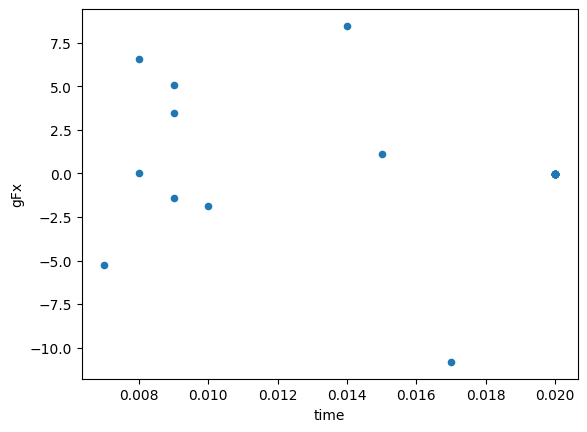

In [28]:
elevator_data.plot.scatter(x = "time", y = "gFx")

A wealth of other functions exist for pandas and I will not exemplify or explain them here because it is beyond the scope of the class. A nice summary sheet for pandas can be found [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


### Writing your dataframe to file
You have already used `savetxt` to save an entire array of numbers to a file in one step.  If your data is in a pandas dataframe, saving that dataframe to file couldn't be easier; just use `dataframe.to_csv("filename")`.

In [29]:
elevator_data.to_csv("myelevatorData.csv")

Several helpful keyword arguments are available when writing to a file.  I'll list a few of them below.

1. `sep` - Delimiter or character used to separate the data as a length-one string.  Default is a comma (",").
2. `columns` - specify which columns in your dataframe to write as a list of column labels.
3. `index` - `True` if you want the row labels written and `False` if you don't
4. `compression` - specify the compression scheme as a string.  Options are 'zip','gzip', 'bz2','zstd', and 'tar'. 


Depending on the type of data you are working with, there is a good argument for always using `to_csv` to write data to file, never needing `savetxt`.



## Flashcards
1. How does `read_csv` work? Give a short example.
2. What is the keyword argument `usecols` used for when reading a dataframe from file?
3. How does the `DataFrame` function work and what type of arguments can you pass it?  Give a few short examples.
4. How do you access/extract multiple columns in their entirety from a dataframe.
5. How do you access/extract multiple rows in their entirety from a dataframe.
6. How do you access/extract the middle part of a dataframe?
7. How do you access/extract only the numbers in a dataframe that meet a given criteria?
8. How do you add a new column to a dataframe?
9. How do you add a new row to a dataframe?
10. Recite Mosiah 4:27.

## Exercises
1. In homework problem 3 from the chapter on dictionaries and sets, you built a dictionary containing planetary information for your top three favorite planets.  
   1. Create a dataframe from this dictionary.
   2. Make the name of the planet be the row label.
   3. Write this dataframe to a csv file.

2. In homework problem 2 from the chapter on numpy, you calculated the moment of inertia for 1000 different objects.  
   1. Create a dataframe out of the mass, radius, length, and inertia data.  The dataframe should have four columns and 1000 rows.
   2. Use `describe` to get a summary of the data.
   3. Write the data to a .csv file and inspect the file to ensure that you did it correctly.

3. In homework problem 3 from the chapter on I/O, you read planetary data into a .csv file using `genfromtxt`.
   1. Read the same file into a dataframe using `read_csv`.  Let the name of the planets be the row label and the physical property be the column label.
   2. The sixth column contains the acceleration due to gravity for all of the planets in units of m/s$^2$.  Recalculate these values to be in terms of earth's value ($g = 9.78$ m/s$^2$) and modify the sixth column.
   3. The seventh column contains the orbital period for all of the planets in units of earth years.  Recalculate these values to be in earth days and modify that column accordingly. 
   4. Add a new column labeled "Surface Temperature" that contains the surface temperature for each planet in Kelvins as given [here](https://solarsystem.nasa.gov/resources/681/solar-system-temperatures/).
   5. Add a new row for a hypothetical planet ("planet X") and set its physical properties equal to the average of the other 9 planets that are already in the dataframe.
   6. Determine which planets have an acceleration due to gravity that is less than earth's value ($9.8 $ m/s$^2$)
   7. Determine which planets have an eccentricity that is greater than $0.04$.
   8. Determine which planet(s) have an inclination greater than $1.5^\circ$ **and** have 10 or more satellites.
   9. Write the a .csv file containing the following columns in the dataframe: "Name", "SurfaceGravity", "OrbitalPeriod", and "Satellites".
   10. Write the entire dataframe to a separate file.  

   Hints:  
      1. For part 5 you will want to use `describe` to generate a dataframe of summary statistics. Then use `append` to add the row labeled "mean" to your original planetary database. Then use `rename` to rename that row from `mean` to `Planet X`.  
      2. The column label for the acceleration due to gravity start with a space: " SurfaceGravity" not "SurfaceGravity".
      3. For part 8 use `query`.  To include the space in the column names, enclose the name in backticks "\`". (i.e. " ` Inclination` > 0.04")